## Here is dataset with multiple features for things which makes us happy


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import pylab

In [2]:
df = pd.read_csv('happy_2019.csv')
df = df.drop(columns=['Overall rank'])
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [3]:
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
def prep_frame(df_year):
    df = pd.DataFrame()
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df = df.set_index(['Country or region'])
    return df
df = prep_frame(df)
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness Score,target,target_n
Country or region,,,,,,,,,,
Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.769,Top,3
Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.600,Top,3
Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.554,Top,3
Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.494,Top,3
Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.488,Top,3


## We use Spearman correlation for measuring the strength and association between features

In [4]:
spearman_cormatrix = df.corr(method='spearman')
spearman_cormatrix

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness Score
Score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348,1.000000
GDP per capita,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203,0.814483
Social support,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017,0.816181
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309,0.807275
Freedom to make life choices,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586,0.551974
Generosity,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171,0.070483
Perceptions of corruption,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000,0.217348
Happiness Score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348,1.000000


## On the left side continuous colormap, on the right binned map

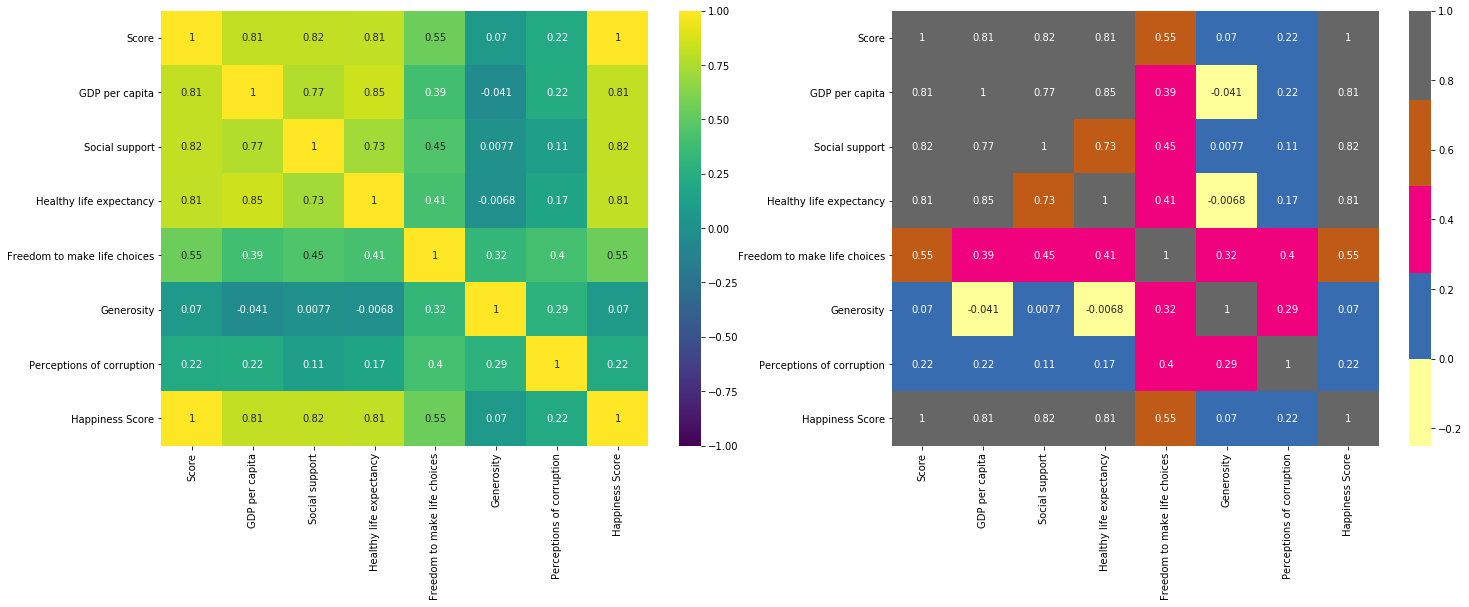

In [5]:
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

### It is look like GDP,Social support, Health life expectancy and Score are stringly corelated. So interesting that Social support correlated with all data positivly

## Let's see comparison of the values, data separated by type of happiness score
<br> -Top = [75%-100%]
<br> -Top-Mid = [50%-75%]
<br> -Low-Mid = [25%-50%]
<br> -Low = [0%-25%]

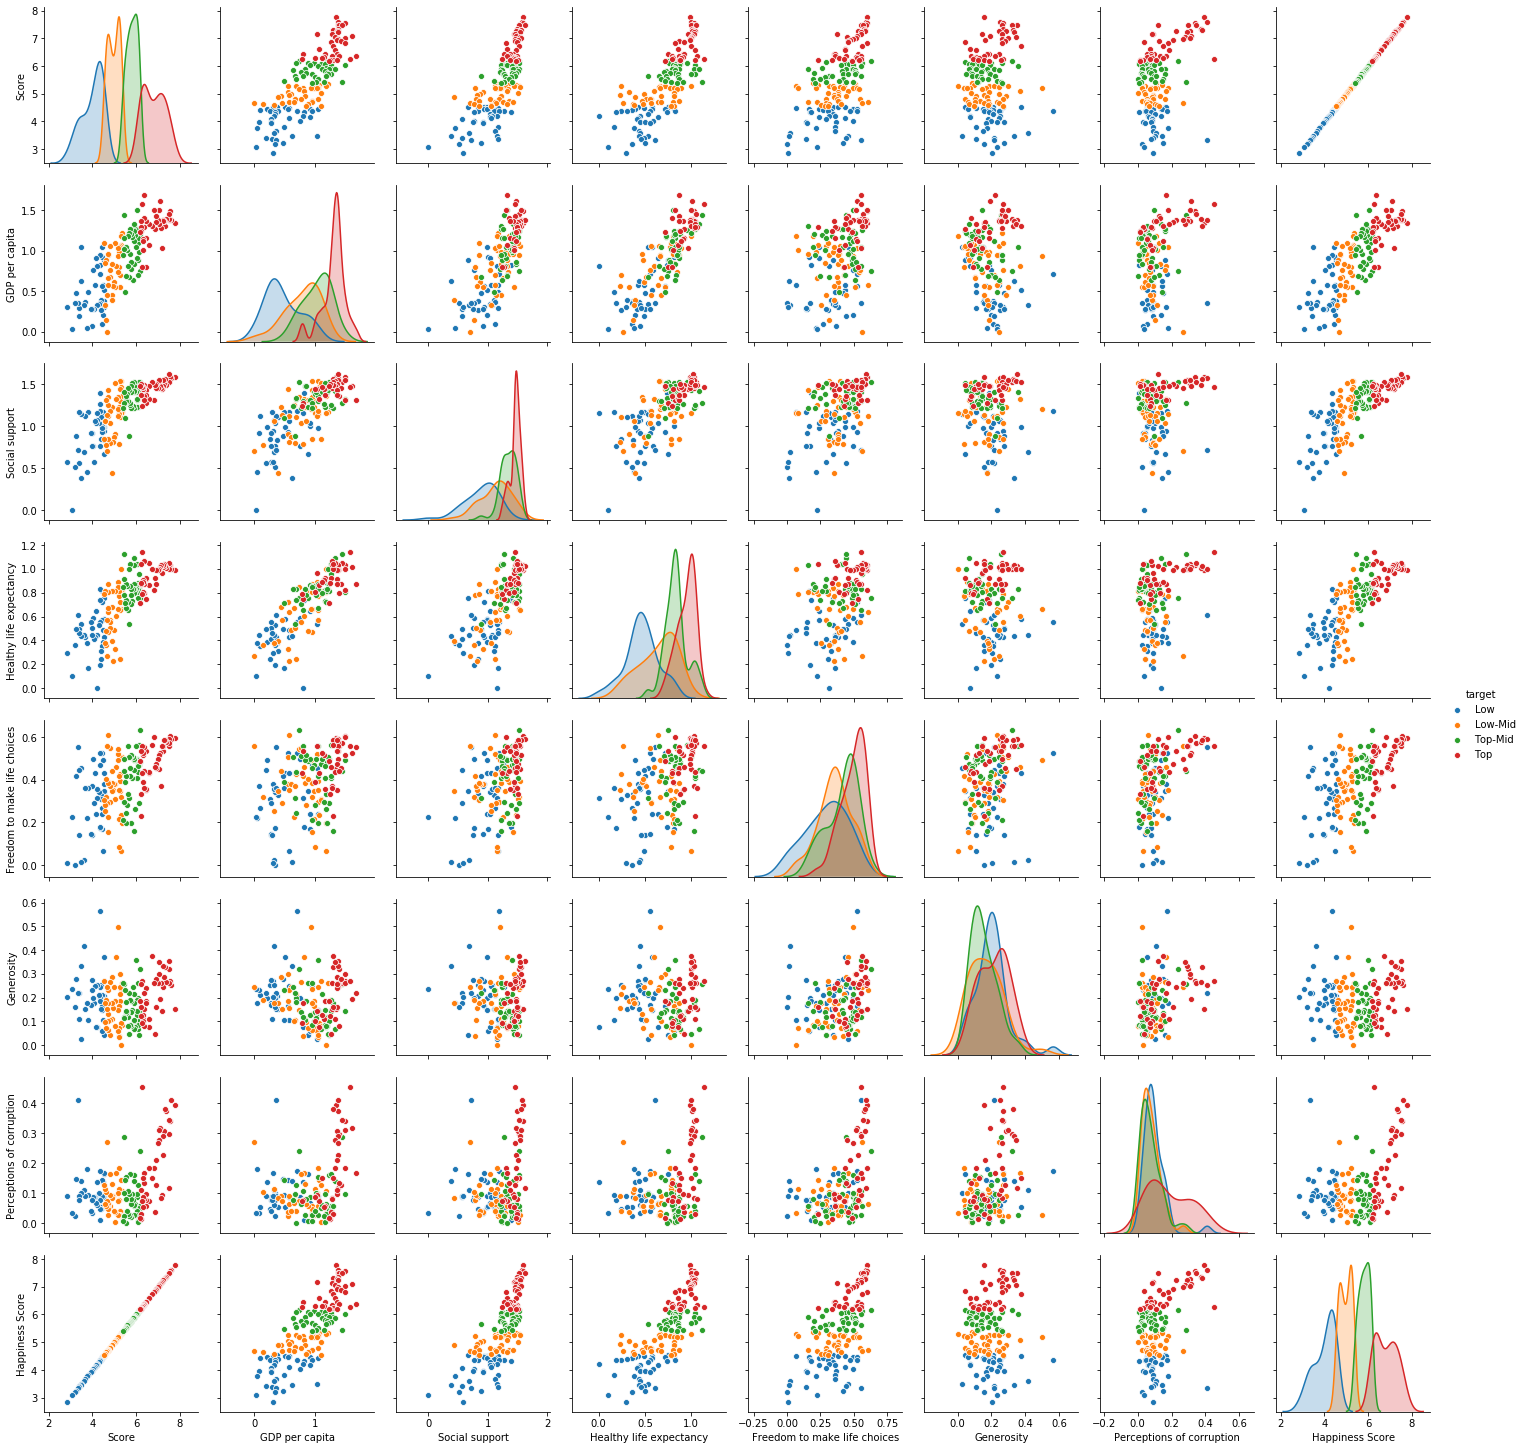

In [6]:
g = sns.pairplot(df.drop(columns=['target_n']), hue='target')

## From the pairmap, we can see that score and GDP per capita is strongly related, as high GDP as high score

# Mow let's try to train model to define level of happiness by GDP, Social support and Health life expectancy. 

In [7]:
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy']]
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
regr.intercept_


1.922373730644952

In [8]:
regr.coef_

array([0.75146723, 1.53412648, 1.30497594])

In [9]:
regr.score(X_train, y_train)

0.768949257856863

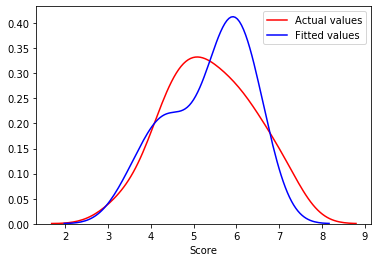

In [10]:
y_prediction = regr.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual values')
sns.distplot(y_prediction, hist=False, color='b', label='Fitted values', ax=ax1)



In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
accuracy_score(y_test, preds)

0.5897435897435898

## In conclusion, after trying classification Naive Bayes, I found that accuracy is very low for prediction class, so in comparison Multiple linear regression is more suitable variant for traning model.